# Assignment 3
### General Instructions
  + The Python standard library is not enough to do solve these questions. You will need to import appropriate libraries for each task. Generally, you might import and use any library you wish unless otherwise stated. 
  + Where detail instructions like variable or function names, required libraries, and etc are not given by the question, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + When you are required to explain or answer in text format open a Markdown cell and enter your answer in it.
  + Do not remove or modify the original cells provided by the instructor.
  + Comment your code whenever needed using # sign at the beginning of the row.
  + Do not hesitate to communicate your questions to the TAs or instructors. Good luck! 

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import *

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV


import scipy.stats  as stats

%matplotlib inline

## Question 1 <span style="color:red">(50 points)</span>
### Binary Classification
  1. Here, we will use the `ziptrain.csv` and `ziptest.csv` datasets from Session07. Upload them here as two separate datasets. 
  2. Explore the data in order to understand it. 
  3. From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  4. Project `binar_train` onto the first two principal components and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs?
  5. Fit a logistic regression, in the new space,to separate digits $2$ and $7$. Evaluate the trainded model on `binar_test` using 
    + recall,
    + precision,
    + accuracy, and 
    + appropriate F-measure.
  6. Build a confusion matrix for your predictions.
  7. Now, instead of using only $2$ principle components, project `binar_train` onto the first $m=2, 3, ...$ principal components (one $m$ at a time), and train a logistic classifier each time. Using `binar_test` for evaluation, choose an $m$ that gives the best classification. 
### Multi-Classification <span style="color:green">(BONUS: 25 points)</span>
  8. Project `ziptrain` (**not `binar_train`**) onto first two principal components and make a scatterplot to confirm wheather or not only two principal components separates **all** digits properly.
  9. Use linear discriminant on `ziptrain` over the $256$ original pixels and build the confusion matrix for the trained model over `ziptrain` (**not `ziptest`**).
  10. Use linear disciminant in spaces of $m=2,3,...$ PCs to train your classifier. Choose the $m$ that gives the best classification result evaluated by the **precision** of predictions over `ziptest` dataset.

#### Answer 1-1

In [249]:
# load the datasets
ziptrain = np.loadtxt("ziptrain.csv")
ziptest = np.loadtxt("ziptest.csv")

#### Answer 1-2

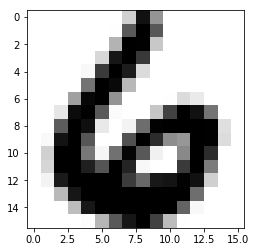

In [250]:
# show the first image
plt.imshow(-ziptrain[0, 1:].reshape(16,16), "gray")

#### Answer 1-3

In [251]:
# get the 2's and 7's for the train data

# first extract the rows that have the number 2
binar_train_2 = ziptrain[ziptrain[:, 0] == 2]

# second extract the rows that have the number 7
binar_train_7 = ziptrain[ziptrain[:, 0] == 7]

# concatenate the two matricies together to get the 2 and the 7
binar_train = np.concatenate((binar_train_2,binar_train_7))


In [252]:
# get the 2's and 7's for the test data

# first extract the rows that have the number 2
binar_test_2 = ziptest[ziptest[:, 0] == 2]


# second extract the rows that have the number 7
binar_test_7 = ziptest[ziptest[:, 0] == 7]

# concatenate the two matricies together to get the 2 and the 7
binar_test = np.concatenate((binar_test_2,binar_test_7))

In [254]:
# randomly select 20 indexes in the binar_train data set
np.random.seed(1)
randomSelection = np.random.choice(range(len(binar_train)), size=20, replace = False)


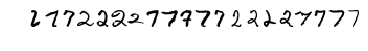

In [257]:
# extract 20 images using the randomly selected indexes

# get the first image
imagesExtract = binar_train[randomSelection[0], 1:].reshape(16, 16)

# loop through the remainng indexes and add each image to the imagesExtract variable
for i in range(1,len(randomSelection)):
    imagesExtract = np.hstack((imagesExtract, binar_train[randomSelection[i],1:].reshape(16, 16)))

    
# display all of the selected images    
plt.imshow(-imagesExtract,"gray");
plt.axis("off");

#### Answer 1-4

In [300]:
# get the first two PC's of the binar_train data
pca = PCA(n_components=2);
t = pca.fit(binar_train[:, 1:]);
Z = pca.transform(binar_train[:,1:]);

# show the two first components
pd.DataFrame(Z).head()

,0,1
0,6.170833,1.125084
1,-3.317885,-1.851940
2,3.073119,-4.297046
3,4.008856,0.497932
4,6.956282,-5.635828


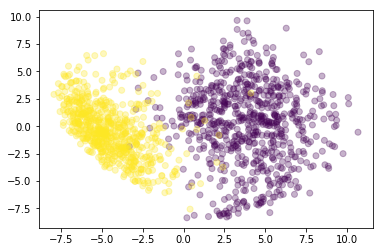

In [301]:
# plot the two first compenents using color codes for the target variables
plt.scatter(Z[:,0], Z[:,1], c= binar_train[:,0], alpha=0.3);

From the scatter plot we can clearly see two distinct clusters. Hence, it will be possible with a classification algorithm (logistic regrasseion or LDQ and QDA) to distinguish between the classes (i.e. digits).

#### Answer 1-5

In [302]:
# create the feature and target variables of the training data set
y = binar_train[:,0]
X = Z

# create the logistic model
twoSevenModel = LogisticRegression(solver='lbfgs');
t = twoSevenModel.fit(X, y);

# get the test feature and target variables for the test data set
Z_test = pca.transform(binar_test[:,1:])
X_test = Z_test
y_test = binar_test[:,0]


The the following performance mesures for the model
recall,
precision,
accuracy, and
appropriate F-measure.


In [303]:
y_pred = twoSevenModel.predict(X_test)

recallScore = recall_score(y_test, y_pred,pos_label=2)
precisonScore = precision_score(y_test, y_pred,pos_label=2)
accScore = accuracy_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred,pos_label=2)

print('The recall score is : ' + str(recallScore))
print('The precision score is : ' + str(precisonScore))
print('The accuracy score is : ' + str(accScore))
print('The f1 score : ' + str(f1Score))

The recall score is : 0.9747474747474747
The precision score is : 0.965
The accuracy score is : 0.9652173913043478
The f1 score : 0.9698492462311558


From the model performance measures above we can see that the logistic model does a good job of predicting the digit. 

#### Answer 1-6

In [304]:
# create abd print the confusion matrix
confMat = confusion_matrix(y_test, y_pred)
print(confMat)

[[193   5]
 [  7 140]]


Out of 345 observations we see that the model has only 12 type 1 and type 2 errors which is good.

#### Answer 1-7

In [305]:
# get the all of the PC's of the data set 
pca = PCA()
t = pca.fit(binar_train[:, 1:])
Z = pca.transform(binar_train[:,1:])


In [306]:
# create the feature and target variables of the training data set
y = binar_train[:,0]
X = Z

# create the logistic model
twoSevenModel = LogisticRegression(solver='lbfgs');

# get the feature and target variables for the test data set
Z_test = pca.transform(binar_test[:,1:])
X_test = Z_test
y_test = binar_test[:,0]

# create an empty data frame  store the results
results = pd.DataFrame(columns=['NumberComponents','Accuracy'])


# loop through the first 30 components, each time adding a principal component to the model and storing 
# the accuracy of the model
for i in range(1,100):
    
    # fit the model
    t = twoSevenModel.fit(X[:,0:i],y);

    # get the prediction on the test data set
    y_pred = twoSevenModel.predict(X_test[:,0:i]);
    
    # calculate the accuracy score for the new model
    accScore = accuracy_score(y_test, y_pred);
    
    # add the results of the model
    results = results.append({'NumberComponents':i,'Accuracy':accScore},ignore_index=True)
    

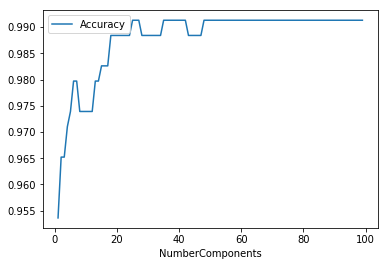

In [307]:
results.plot('NumberComponents','Accuracy');

From the graf of the Number of Prncipal Components vs the Accuracy we can see that after adding the first 20 components to the model we do not get an increase in model accuracy. Furthermore, if we add further components we risk increasing the variance of the model for prediction with new data.

#### Answer 1-8

In [292]:
# load the zip training data set
ziptrain = np.loadtxt("ziptrain.csv")

In [308]:
# make a model for all the PC's
pca = PCA()
t = pca.fit(ziptrain[:, 1:])

In [309]:
# get the PC's and display the results
Z = pca.transform(ziptrain[:,1:])
pd.DataFrame(Z).head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,4.942676,-6.228921,-2.354756,2.083122,-0.048570,0.474928,1.892011,-0.423544,0.263685,1.097918,...,0.003792,0.007153,0.005600,0.022536,0.020120,0.003834,-0.010355,-0.005850,0.001225,-0.006579
1,6.964488,-1.157790,1.413910,-3.973358,1.773561,-1.522280,-0.861538,-0.536979,5.456911,2.477604,...,-0.076916,0.037769,0.098999,-0.034936,0.043793,-0.095046,-0.027603,-0.000264,-0.004261,0.009890
2,0.979480,1.928036,-3.619642,5.080300,-2.856182,1.847463,-2.655222,-0.598293,1.224966,2.028185,...,0.009282,-0.007332,-0.021057,-0.002475,0.003658,-0.019992,-0.005224,0.012799,0.000123,-0.003022
3,-2.515794,6.528194,1.638482,0.171852,0.036196,-0.818649,1.308863,-2.289900,-0.731842,-1.637200,...,-0.001917,0.000368,0.010983,0.007846,-0.000661,0.011213,0.003468,-0.000406,0.000239,0.004638
4,2.686991,-0.301129,-0.532582,-7.490324,-0.836284,1.819942,-2.244241,-1.689714,1.316321,2.255356,...,-0.010138,0.002540,0.012146,-0.039284,0.002890,0.024787,-0.011664,-0.041800,-0.010919,0.001547


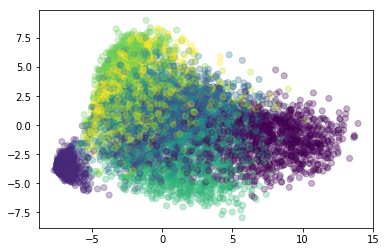

In [311]:
# make a scatter plot of the first two PC's with the color code of the digits
plt.scatter(Z[:,0], Z[:,1], c= ziptrain[:,0], alpha=0.3);

From the scatter plot above of the two first PC's we can see that the clusters of the different categories (i.e. digits) overlap alot. Hence, we will need to use more than two PC's in order to classify the different digits.

#### Answer 1-9

In [312]:
# create the feature (one for every pixel value) and the target variables
X = ziptrain[:,1:]
y = ziptrain[:,0]

# create the LDA model
zipLDA = LinearDiscriminantAnalysis()
t = zipLDA.fit(X,y);

In [313]:
# get the predicted values based on the training set as asked
y_pred = zipLDA.predict(X)

# create and print the confusion matrix
confMat = confusion_matrix(y, y_pred)
print(confMat)

[[1167    0    1    3    4    2   10    0    7    0]
 [   0 1001    1    0    0    0    0    0    1    2]
 [   3    1  657   21   14    3    7    4   18    3]
 [   3    0    3  618    0   10    0    6   15    3]
 [   1   16    9    0  592    1    4    0    6   23]
 [   8    0    2   17    7  507    4    0    9    2]
 [   4    6    4    0   10    6  626    0    8    0]
 [   0    1    0    1   11    1    0  588    2   41]
 [   6    2    2   23   14    9    4    2  477    3]
 [   0    2    0    2   19    0    0   13    2  606]]


In [314]:
# for the fun of it here is the precision score for the LDA model on the pixels
precisonScore = precision_score(y, y_pred, average='weighted')
print(precisonScore)

0.9388098208727268


Not bad with the pixels instead we get a good precision score. However we must not forget that we are using a model with 256 feature variables. This could results in model with high variance and not to mention that it is also computationnaly expensive.

#### Answer 1-10

In [315]:
# load the zip test data set
ziptest = np.loadtxt("ziptest.csv")

In [320]:
# create the feature and target variables of the taining data set
y = ziptrain[:,0]
X = Z

# create the LDA model
zipLDA_model2 = LinearDiscriminantAnalysis();

# get the feature and target variables for the test data set
Z_test = pca.transform(ziptest[:,1:])
X_test = Z_test
y_test = ziptest[:,0]

# create an empty data frame  store the results
results = pd.DataFrame(columns=['NumberComponents','Precision'])


# try the first 100 PC's and progressively add to the model
for i in range(1,100):
    
    # train the model
    t = zipLDA_model2.fit(X[:,0:i],y);

    # predict with the test data
    y_pred = zipLDA_model2.predict(X_test[:,0:i]);
    
    # calculate the precision score of the model
    precisionScore = precision_score(y_test, y_pred, average='weighted' )
    
    # add the results of the model to the results dataframe
    results = results.append({'NumberComponents':i,'Precision':precisionScore},ignore_index=True)
    

/Users/vince/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [321]:
# print the first 20 model results
results.head(20)

,NumberComponents,Precision
0,1.0,0.345547
1,2.0,0.480390
2,3.0,0.530730
3,4.0,0.651146
4,5.0,0.673548
5,6.0,0.723937
6,7.0,0.749575
7,8.0,0.764692
8,9.0,0.774367
9,10.0,0.796864


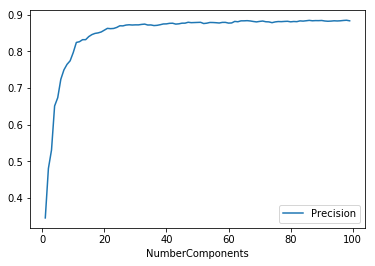

In [322]:
results.plot('NumberComponents','Precision')

From the plot above of Number of Components vs Prcision we can see that pas 40 PC's there is no substanial gain in precision. Hence I would select the 40 first PC's to model the zip data set.

## Question 2 <span style="color:red">(50 points)</span>

The objective of this exercise is to understand the notions of underfitting and overfitting. Using cross-validation on simulated data, we will be able to visualize the two concepts.

##### Synthetic data
1. Generate 100 points equally distanced from -20 to 20 and save them in a `numpy` array `x`.
2. Create a new numpy array `y` defined as $y_i=\mathrm{sin}(x_i) + 0.05 x_i^3 + \varepsilon_i$ where $\varepsilon_i \sim \mathcal{N}(0,100^2)$, for $i=1,...,100$.
3. Plot the scatter plot of `x` and `y`. Do you think that a linear model could fit this data?

##### Underfitting vs. Overfitting
4. Fit a linear regression model and call it `model1` : $y=\beta_0 + \beta_1 x$ and add the fitted line over the scatter plot.
5. Compute the mean squared error of `model1`. **Hint** : You can use `sklearn.metrics.mean_squared_error`.
6. Fit a polynomial regression model with degree 5 and call it `model2` : $y=\beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_5 x^5$. **Hint** : You can use `sklearn.preprocessing.PolynomialFeatures` in order to create a **new** input array that includes $x^0$, $x^1$, $x^2$, $x^3$ ...
7. Add the fitted curve over the scatter plot and compare `model2` and `model1`.
8. Compute the mean squared error of `model2`.
9. Fit a polynomial regression model with degree 20 and call it `model3` : $y=\beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_{20} x^{20}$.
10. Add the fitted curve over the scatter plot and compare the three models. What is the mean squared error of `model3`?

##### Cross-Validation
11. Using $10$-fold cross-validation, compute the **averaged validation** mean squared errors for all possible polynomial models by varying the degree of the polynomial model from $1$ to $20$.
12. Plot the **averaged validation** MSE with respect to the degree of the model. **Hint** : $x$-axis is defined as the degree of the polynomial model, i.e., $1,2,3,...,20$ and $y$-axis is its associated MSE.


##### LASSO
13. Using $10$-fold cross-validation and the LASSO regularization, fit the polynomial model with degree 20 and call it `model4`. What is the best regularization constant? Show it in a curve. **Hint** : Here, you need to apply the $10$-fold cross-validation over a sequence of regularization constants. The figure will show you what is the best regularization constant, based on MSE or $R^2$.
14. Based on the LASSO model, what is the best final model? **Hint** : Once you have chosen the best regularization constant, you can extract the associated coefficients.

#### Adjusted R2

In order to compare the models with multiple parameters I will also use the adjusted R2. So the following function that takes the R2 values the number of values n and the numper of parameters p in the model to calculate.


In [341]:
def adjR2(R2,n,p):
    """
    Function that calculates adjusted R2 based on the number of observations n and the number of parameters p
    """
    result = 1-(1-R2)*(n-1)/(n-p-1)
    
    return result

#### Answer 2-1

In [342]:
# create the x (i.e. feature) of the data set for 100 equally spaced values between 
numberObs = 100
x = np.linspace(-20, 20, num=numberObs)

#### Answer 2-2

In [343]:
# create the target variable y with the defined function with random noise
e = stats.norm.rvs(loc=0,scale=100,size=100)
y = np.sin(x) + 0.5 *x**3 + e

#### Answer 2-3

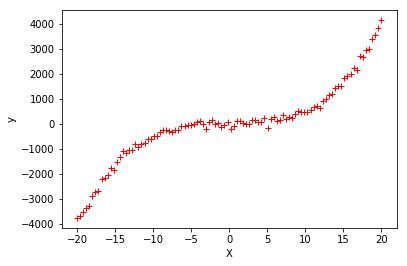

In [344]:
# plot the created data set
plt.plot(x,y,'+r');
plt.xlabel('X');
plt.ylabel('y');

#### Answer 2-4

In [345]:
# get the feature and target variables for model 1
X_m1 = x.reshape(-1, 1)
y = y.reshape(-1, 1)

numberObs = 100

# create the linear regression model 1
model1 = LinearRegression()

# fit the model 1
model1.fit(X_m1,y)

# predict values of the model 1
y_pred_m1 = model1.predict(X_m1);

#### Answer 2-5

In [346]:
# calculate the mse and adjusted R2 values for model 1
mseModel1 = mean_squared_error(y,y_pred_m1)
r2_model1 = r2_score(y,y_pred_m1)
adjr2_model1 = adjR2(r2_model1,numberObs,1)

print('The MSE for model1 is : '+str(mseModel1))
print('The Adj R2 for model1 is : '+str(adjr2_model1))

The MSE for model1 is : 393980.7750766384
The Adj R2 for model1 is : 0.8352092014676575


#### Answer 2-6

In [347]:
# create the features of polynomial degree 5 for model 2
poly = PolynomialFeatures(5)
X_m2 = poly.fit_transform(x.reshape(-1, 1))

In [348]:
# create the  model 
model2 = LinearRegression()

# fit the model 2
model2.fit(X_m2, y)

# predict values of the model 2 
y_pred_m2 = model2.predict(X_m2);

#### Answer 2-7

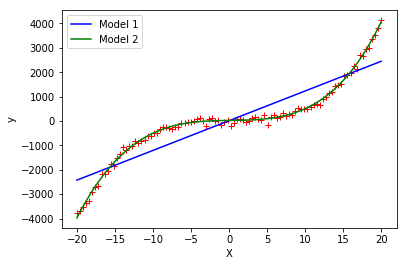

In [349]:
# plot the raw data as well as model 1 and model 2 predicted values
plt.plot(x,y,'+r') ;
plt.plot(x,y_pred_m1,'-b',label='Model 1');
plt.plot(x,y_pred_m2,'-g',label='Model 2');
plt.legend();
plt.xlabel('X');
plt.ylabel('y');

From the plot above we can see that the polynomial model of degree 5 (model 2) is better at predicting the values than model 1.

#### Answer 2-8

In [350]:
# calculate the mse and adjusted R2 values for model 2
mseModel2 = mean_squared_error(y,y_pred_m2)
r2_model2 = r2_score(y,y_pred_m2)
adjr2_model2 = adjR2(r2_model2,numberObs,5)

print('The MSE for model2 is : '+str(mseModel2))
print('The Adj R2 for model2 is : '+str(adjr2_model2))

The MSE for model2 is : 9218.05762364808
The Adj R2 for model2 is : 0.995980282165393


From the results above and that of question 2-5 we can see that the MSE is much lowe for model 2 than for model 1. In both cases the adjusted R2 value was also computed, and we can cofirm here that he R2 value is higher for model 2 than for model 1. Hence model 2 is a better model based on the two performance measures.

#### Answer 2-9

In [351]:
# create the fetures with a ploynomial of degree 20
poly = PolynomialFeatures(20)
X_m3 = poly.fit_transform(x.reshape(-1, 1))

# make the model 3
model3 = LinearRegression()

# fit the model 3
model3.fit(X_m3, y)

# predict values of the model 3
y_pred_m3 = model3.predict(X_m3);

#### Answer 2-10

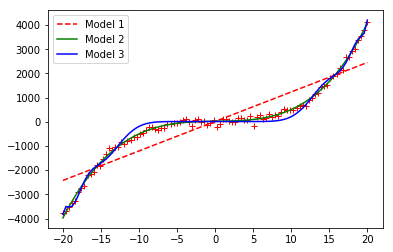

In [352]:
# plot the raw data as well as the results of model 1, 2 and 3
plt.plot(x,y,'+r');
plt.plot(x,y_pred_m1,'--r',label='Model 1');
plt.plot(x,y_pred_m2,'-g',label='Model 2');
plt.plot(x,y_pred_m3,'-b',label='Model 3');
plt.legend();

It can be see from the above plot that the Model 2 is better at fitting thab model 3. At the infelexion points model 3 deviates more than model 2 with respect to the raw data.

In [201]:
# calculate the mse and adjusted R2 values for model 3
mseModel3 = mean_squared_error(y,y_pred_m3)
r2_model3 = r2_score(y,y_pred_m3)
adjr2_model3 = adjR2(r2_model3,numberObs,20)

print('The MSE for model3 is : '+str(mseModel3))
print('The Adj R2 for model3 is : '+str(adjr2_model3))

The MSE for model3 is : 28301.98076795379
The Adj R2 for model3 is : 0.9855902308121532


It is interesting to see that the increase in the number of features ( i.e. model complexity) between model 2 and model 3 has not decreased the MSE but has increased it. The same trand can be seen with the adjusted R2, the R2 has decreased with the increase in the number of features. This means that add mode complexity has resulted in a worse model for prediction.

#### Answer 2-11

In [353]:
# prepare cross validation
kfold = KFold(10, True, 1)

# create an empty data frame  store the results
results = pd.DataFrame(columns=['PolyDegree','AvgMSE'])

# polynomial from 1 to 20
for i in range(1,21):
    
    # create the features of poy degree i
    poly = PolynomialFeatures(i)
    X = poly.fit_transform(x.reshape(-1, 1))

    # create the model
    modelX = LinearRegression();
    
    # create a vector to store all of the MSE of thw 10 fold cross validation
    avgMSEVector = np.array([])

    # train and test for every fold
    for train, test in kfold.split(X):
        
        # fit the model with the training data
        t = modelX.fit(X[train], y[train])

        # predict values for the test data
        y_pred_mX = modelX.predict(X[test]);
        
        # calculate the MSE
        mse = mean_squared_error(y[test],y_pred_mX)

        # add the MSE to the vector
        avgMSEVector = np.append(avgMSEVector,mse)
    
    # add the average MSE value for the model to the results dataframe
    results = results.append({'PolyDegree':i,'AvgMSE':avgMSEVector.mean()},ignore_index=True)


#### Answer 2-12

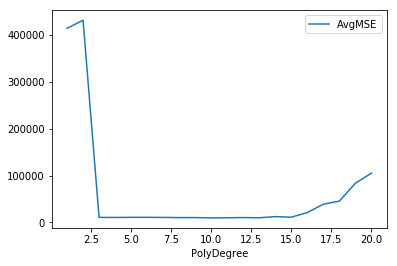

In [354]:
results.plot(x='PolyDegree',y='AvgMSE')

From the above plot we can see that beyond a ploynomial degree of 3 thre is no significant reduction in the model MSE using 10 fold cross validation.

#### Answer 2-13

In [246]:
poly = PolynomialFeatures(20)
X = poly.fit_transform(x.reshape(-1, 1))

alpha_values = np.linspace(0.003, 0.020, num= 100)

lrcv = LassoCV(alphas = alpha_values, cv = 10, normalize = True);
t = lrcv.fit(X,y);

/Users/vince/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vince/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/vince/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/vince/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conver

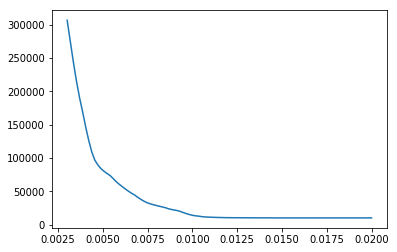

In [247]:
cv_values = np.mean(lrcv.mse_path_, axis=1)
alpha_values = lrcv.alphas_
plt.plot(alpha_values, cv_values);

In [248]:
print("Best regularization parameter:", lrcv.alpha_)
print("Coefficients are:", lrcv.coef_)
print("R Squared:", lrcv.score(X,y))

Best regularization parameter: 0.016393939393939395
Coefficients are: [ 0.00000000e+00  4.30246153e+00 -2.34366056e-02  4.28468400e-01
 -6.98251313e-05  2.05466113e-04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.00658992e-13
  0.00000000e+00 -9.72063681e-16  1.00392356e-17 -0.00000000e+00
  1.50086113e-19 -0.00000000e+00  7.98092299e-23 -0.00000000e+00
  0.00000000e+00]
R Squared: 0.9966204763824266
